# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs

# Reading Dataset

In [2]:
path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)

# Checking top 5 values

In [3]:
df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


# Plotting df

<Axes: >

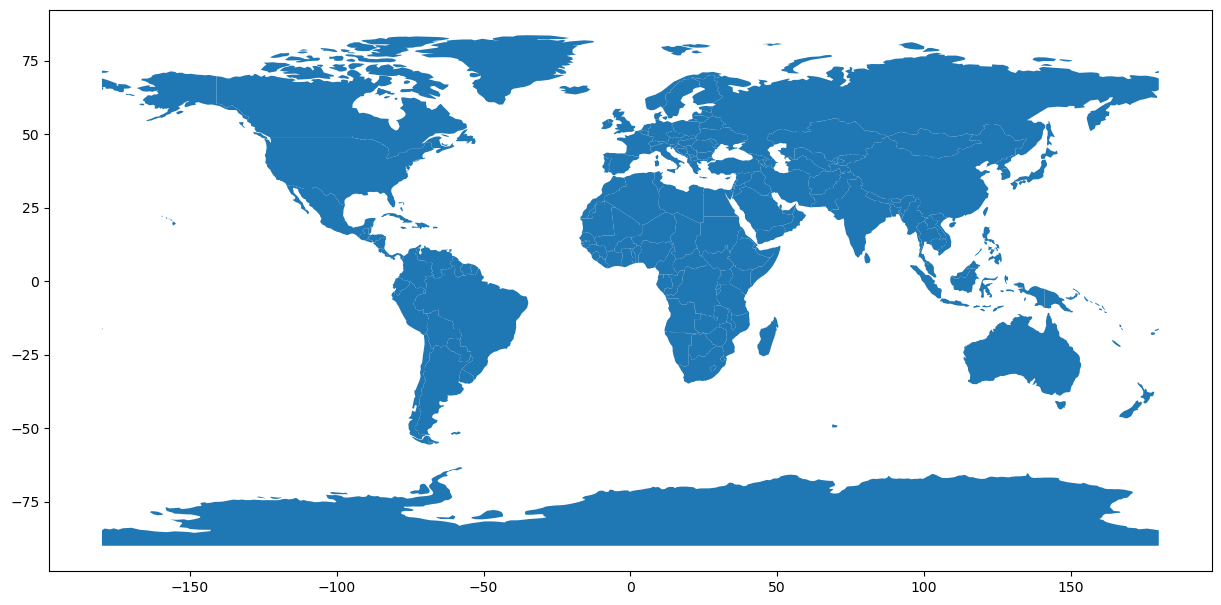

In [15]:
df.plot(figsize=(15,15))

In [16]:
df.explore()

# Checking values of 'continent' column

<Axes: >

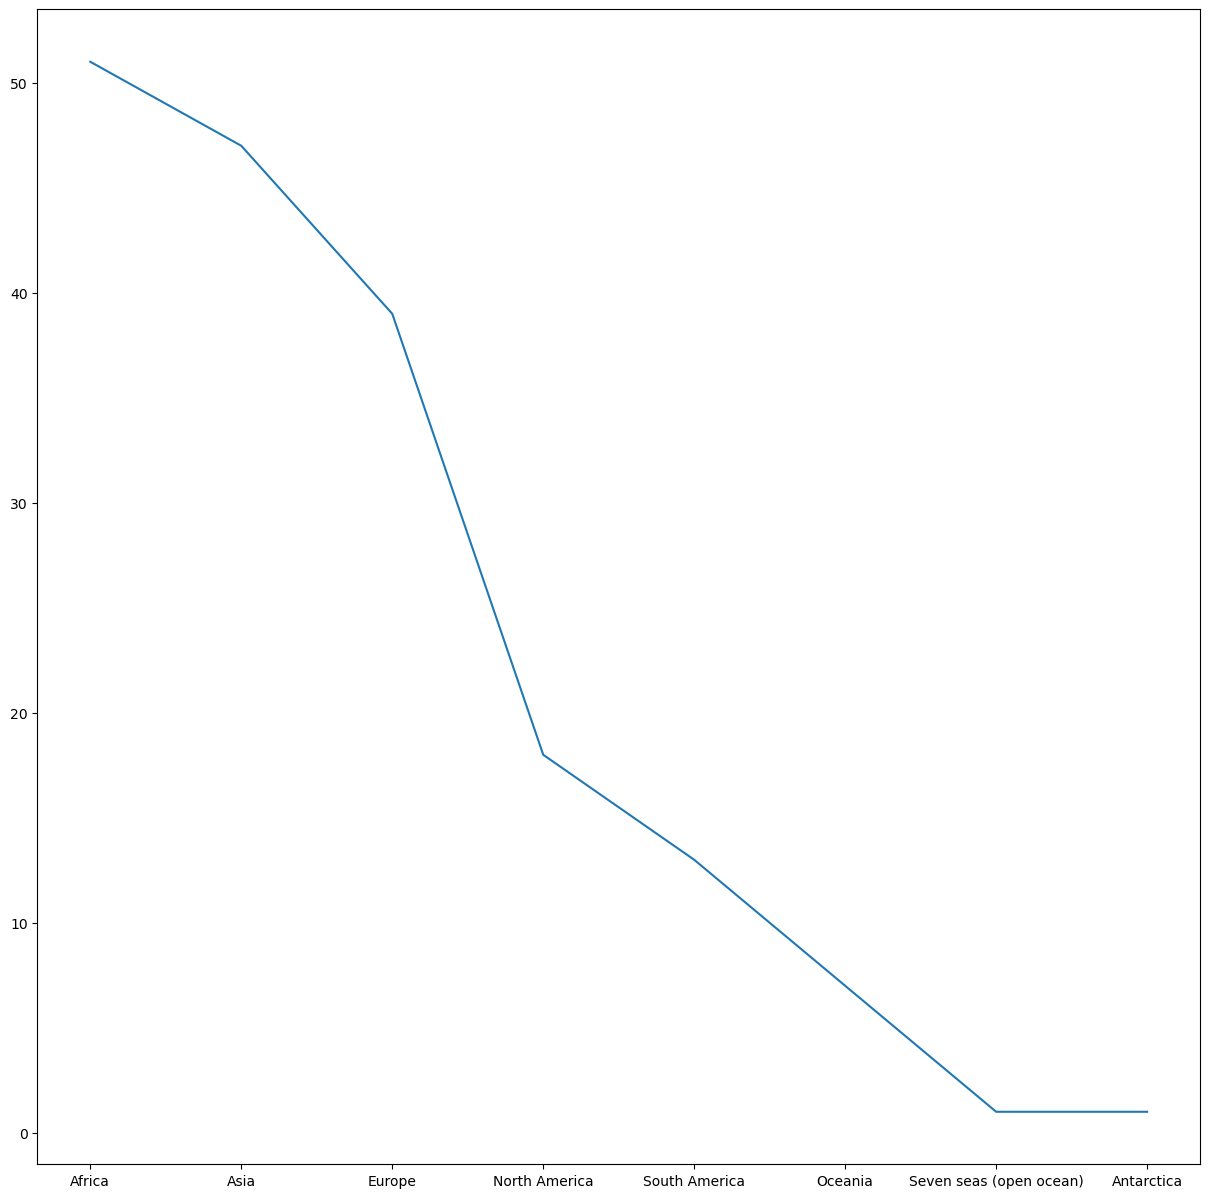

In [12]:
df['continent'].value_counts().plot(figsize=(15,15))

# Creating a new column

In [13]:
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

# Plotting with CartoPy

<Axes: >

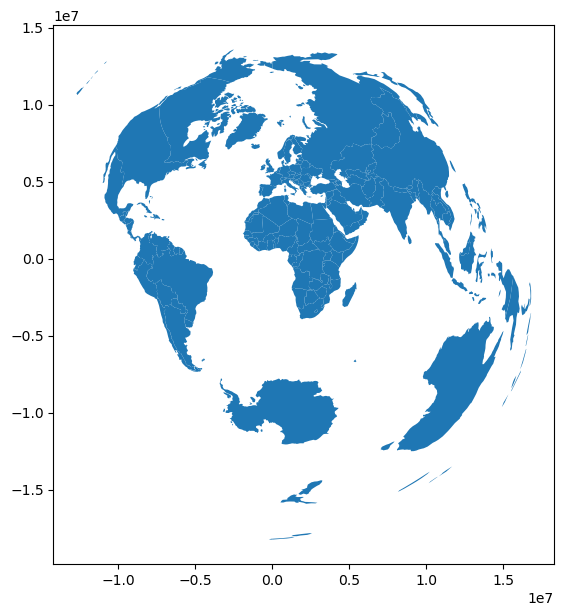

In [19]:
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot(figsize=(7,7))

# Plotting CRS based data in CartoPy

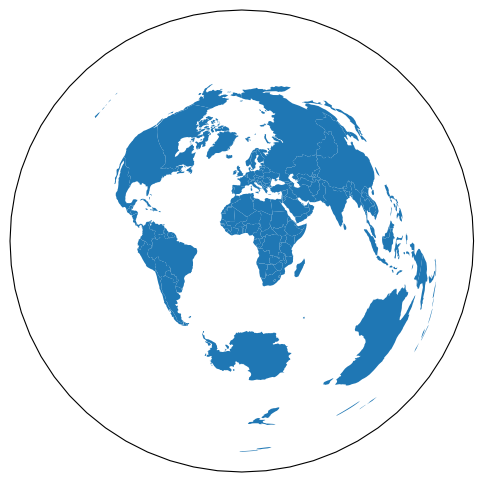

In [22]:
fig, ax = plt.subplots(subplot_kw={'projection': crs},figsize=(6,6))
ax.add_geometries(df_ae['geometry'], crs=crs)

# using .to_crs

<GeoAxes: >

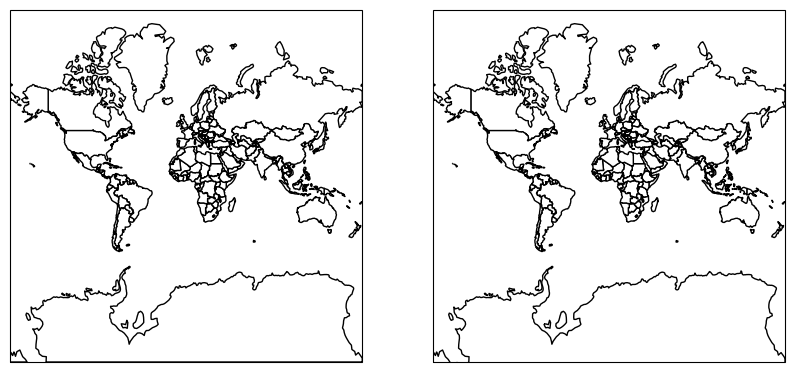

In [27]:
crs_epsg = ccrs.epsg('3857')
df_epsg = df.to_crs(epsg='3857')

# Generate a figure with two axes, one for CartoPy, one for GeoPandas

fig, axs = plt.subplots(1, 2, subplot_kw={'projection': crs_epsg},
                        figsize=(10, 5))

# Make the CartoPy plot

axs[0].add_geometries(df_epsg['geometry'], crs=crs_epsg,
                      facecolor='white', edgecolor='black')

# GeoPandas plot

df_epsg.plot(ax=axs[1], color='white', edgecolor='black')



# CartoPy to GeoPandas

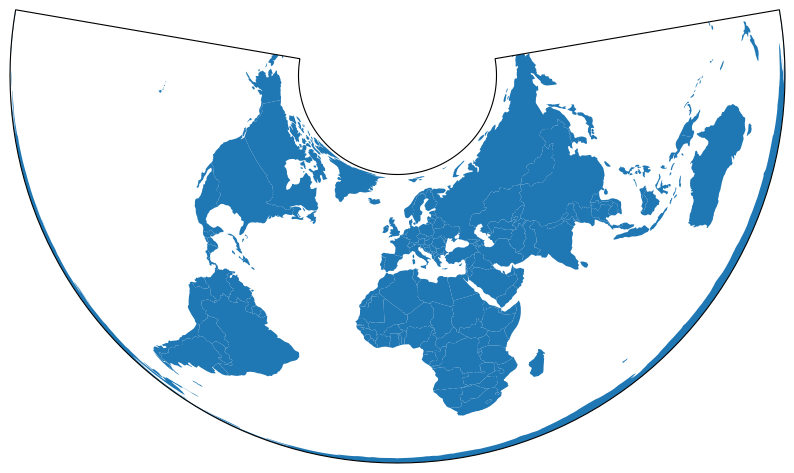

In [30]:
crs_new = ccrs.AlbersEqualArea()
new_geometries = [crs_new.project_geometry(ii, src_crs=crs)
                  for ii in df_ae['geometry'].values]

fig, ax = plt.subplots(subplot_kw={'projection': crs_new}, figsize=(10,10))
ax.add_geometries(new_geometries, crs=crs_new)

# Geopandas figure

<Axes: >

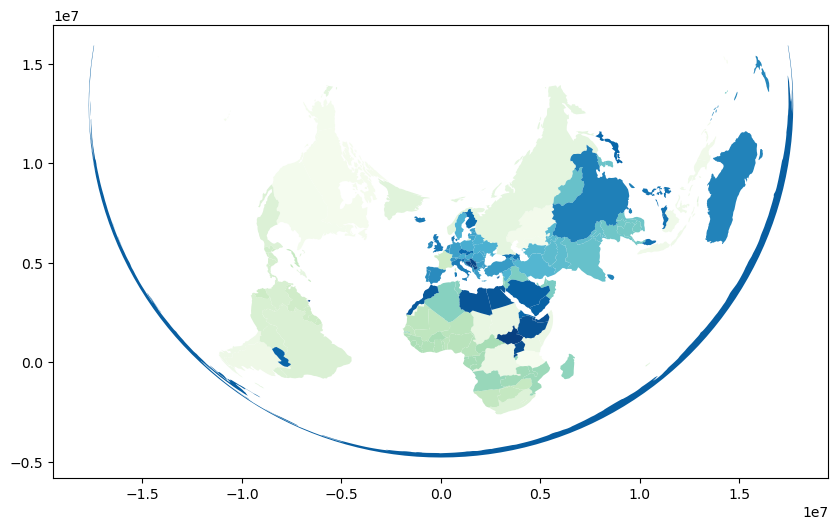

In [35]:
df_aea = geopandas.GeoDataFrame(df['gdp_pp'], geometry=new_geometries,
                                crs=crs_new.proj4_init)
df_aea.plot(figsize=(10,10), cmap='GnBu', legend=True)

# CartoPy figure

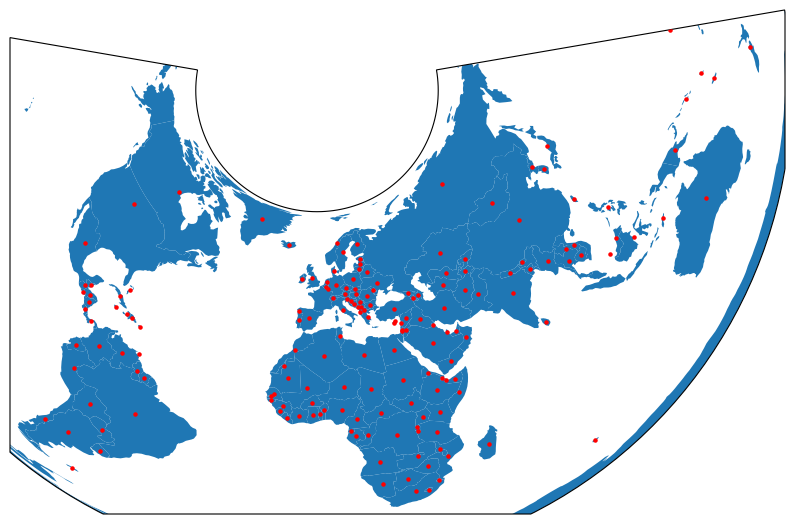

In [45]:
# Generate a CartoPy figure and add the countries to it

fig, ax = plt.subplots(subplot_kw={'projection': crs_new},figsize=(10,10))
ax.add_geometries(new_geometries, crs=crs_new)

# Calculate centroids and plot

df_aea_centroids = df_aea.geometry.centroid

# Need to provide "zorder" to ensure the points are plotted above the polygons

df_aea_centroids.plot(ax=ax, markersize=5, color='r', zorder=10)

plt.show()